In [1]:
cd ../deepsalience/

/Users/bittner/Dropbox/MARL/repos/multif0/deepsalience


In [2]:
import evaluate
import glob
import os
import mir_eval
import pandas

## evaluate

In [5]:
def get_mf0_scores(est_path, ref_path, test_set_name, algorithm_name):

    all_scores = []
    est_files = glob.glob(os.path.join(est_path, '*.txt'))

    for est_file in est_files:
        print(est_file)
#         print(ref_file)
        file_key = "_".join(os.path.basename(est_file).replace('-', '_').split('_')[:2])
        file_key = file_key.split('.')[0]
        print(file_key)
        file_glob = glob.glob(os.path.join(ref_path, '{}*.txt'.format(file_key)))
        if len(file_glob) > 1:
            print(file_glob)
        ref_file = file_glob[0]

#         print(ref_file)
        # load ground truth labels
        ref_times, ref_freqs = \
            mir_eval.io.load_ragged_time_series(ref_file)
        
#         for i, (tms, fqs) in enumerate(zip(ref_times, ref_freqs)):
#             if any(fqs == 0):
#                 ref_freqs[i] = np.array([f for f in fqs if f > 0])

#         print(ref_freqs)
        # load est labels
        est_times, est_freqs = \
            mir_eval.io.load_ragged_time_series(est_file)

            
        # get multif0 metrics and append
        scores = mir_eval.multipitch.evaluate(
            ref_times, ref_freqs, est_times, est_freqs)
        scores['track'] = file_key
        all_scores.append(scores)
    
    # save scores to data frame
    save_path = '/Users/bittner/Dropbox/MARL/repos/multif0/comparisons/algorithm_outputs'
    scores_path = os.path.join(
        save_path, '{}_{}_all_scores.csv'.format(test_set_name, algorithm_name)
    )
    score_summary_path = os.path.join(
        save_path, "{}_{}_score_summary.csv".format(test_set_name, algorithm_name)
    )
    df = pandas.DataFrame(all_scores)
    df.to_csv(scores_path)
    df.describe().to_csv(score_summary_path)
    print(df.describe())

In [6]:
get_mf0_scores(
    '../comparisons/algorithm_outputs/bach10/benetos/',
    '../comparisons/bach10/',
    'bach10', 'benetos'
)

../comparisons/algorithm_outputs/bach10/benetos/01-AchGottundHerr.txt
01_AchGottundHerr
../comparisons/algorithm_outputs/bach10/benetos/02-AchLiebenChristen.txt
02_AchLiebenChristen
../comparisons/algorithm_outputs/bach10/benetos/03-ChristederdubistTagundLicht.txt
03_ChristederdubistTagundLicht
../comparisons/algorithm_outputs/bach10/benetos/04-ChristeDuBeistand.txt
04_ChristeDuBeistand
../comparisons/algorithm_outputs/bach10/benetos/05-DieNacht.txt
05_DieNacht
../comparisons/algorithm_outputs/bach10/benetos/06-DieSonne.txt
06_DieSonne
../comparisons/algorithm_outputs/bach10/benetos/07-HerrGott.txt
07_HerrGott
../comparisons/algorithm_outputs/bach10/benetos/08-FuerDeinenThron.txt
08_FuerDeinenThron
../comparisons/algorithm_outputs/bach10/benetos/09-Jesus.txt
09_Jesus
../comparisons/algorithm_outputs/bach10/benetos/10-NunBitten.txt
10_NunBitten
       Precision     Recall   Accuracy  Substitution Error  Miss Error  \
count  10.000000  10.000000  10.000000           10.000000   10.000000

In [8]:
get_mf0_scores(
    '../comparisons/algorithm_outputs/bach10/duan/',
    '../comparisons/bach10/',
    'bach10', 'duan'
)

../comparisons/algorithm_outputs/bach10/duan/01_AchGottundHerr_multif0_mirexf0.txt
01_AchGottundHerr
../comparisons/algorithm_outputs/bach10/duan/02_AchLiebenChristen_multif0_mirexf0.txt
02_AchLiebenChristen
../comparisons/algorithm_outputs/bach10/duan/03_ChristederdubistTagundLicht_multif0_mirexf0.txt
03_ChristederdubistTagundLicht
../comparisons/algorithm_outputs/bach10/duan/04_ChristeDuBeistand_multif0_mirexf0.txt
04_ChristeDuBeistand
../comparisons/algorithm_outputs/bach10/duan/05_DieNacht_multif0_mirexf0.txt
05_DieNacht
../comparisons/algorithm_outputs/bach10/duan/06_DieSonne_multif0_mirexf0.txt
06_DieSonne
../comparisons/algorithm_outputs/bach10/duan/07_HerrGott_multif0_mirexf0.txt
07_HerrGott
../comparisons/algorithm_outputs/bach10/duan/08_FuerDeinenThron_multif0_mirexf0.txt
08_FuerDeinenThron
../comparisons/algorithm_outputs/bach10/duan/09_Jesus_multif0_mirexf0.txt
09_Jesus
../comparisons/algorithm_outputs/bach10/duan/10_NunBitten_multif0_mirexf0.txt
10_NunBitten
        Accura

In [9]:
get_mf0_scores(
    '../comparisons/algorithm_outputs/su/duan/',
    '../comparisons/Su_multif0/gt_F0/',
    'su', 'duan'
)

../comparisons/algorithm_outputs/su/duan/PQ02_Elgar_audiomirexf0.txt
PQ02_Elgar
../comparisons/algorithm_outputs/su/duan/PQ03_Farranc_audiomirexf0.txt
PQ03_Farranc
../comparisons/algorithm_outputs/su/duan/PS01_Beethoven_audiomirexf0.txt
PS01_Beethoven
../comparisons/algorithm_outputs/su/duan/PS02_Chopin_audiomirexf0.txt
PS02_Chopin
../comparisons/algorithm_outputs/su/duan/PS03_Mozart_audiomirexf0.txt
PS03_Mozart
../comparisons/algorithm_outputs/su/duan/SQ01_Beethoven_audiomirexf0.txt
SQ01_Beethoven
../comparisons/algorithm_outputs/su/duan/SQ02_Janacek_audiomirexf0.txt
SQ02_Janacek
../comparisons/algorithm_outputs/su/duan/SQ03_Schubert_audiomirexf0.txt
SQ03_Schubert
../comparisons/algorithm_outputs/su/duan/VS01_Schumann_audiomirexf0.txt
VS01_Schumann
../comparisons/algorithm_outputs/su/duan/VS04_Franck_audiomirexf0.txt
VS04_Franck
        Accuracy  Chroma Accuracy  Chroma False Alarm Error  \
count  10.000000        10.000000                 10.000000   
mean    0.317448         0.39286

In [10]:
get_mf0_scores(
    '../comparisons/algorithm_outputs/su/benetos/',
    '../comparisons/Su_multif0/gt_F0/',
    'su', 'benetos'
)

../comparisons/algorithm_outputs/su/benetos/PQ02_Elgar.txt
PQ02_Elgar
../comparisons/algorithm_outputs/su/benetos/PQ03_Farranc.txt
PQ03_Farranc
../comparisons/algorithm_outputs/su/benetos/PS01_Beethoven.txt
PS01_Beethoven
../comparisons/algorithm_outputs/su/benetos/PS02_Chopin.txt
PS02_Chopin
../comparisons/algorithm_outputs/su/benetos/PS03_Mozart.txt
PS03_Mozart
../comparisons/algorithm_outputs/su/benetos/SQ01_Beethoven.txt
SQ01_Beethoven
../comparisons/algorithm_outputs/su/benetos/SQ02_Janacek.txt
SQ02_Janacek
../comparisons/algorithm_outputs/su/benetos/SQ03_Schubert.txt
SQ03_Schubert
../comparisons/algorithm_outputs/su/benetos/VS01_Schumann.txt
VS01_Schumann
../comparisons/algorithm_outputs/su/benetos/VS04_Franck.txt
VS04_Franck
        Accuracy  Chroma Accuracy  Chroma False Alarm Error  \
count  10.000000        10.000000                 10.000000   
mean    0.355545         0.426031                  0.164506   
std     0.051333         0.051726                  0.161800   
min   

In [48]:
import numpy as np
get_mf0_scores(
    '../comparisons/algorithm_outputs/mdb_test/duan/',
    '../comparisons/mdb_test/',
    'mdb_test', 'duan'
)

../comparisons/algorithm_outputs/mdb_test/duan/AClassicEducation_NightOwl_multif0_MIXmirexf0.txt
AClassicEducation_NightOwl
../comparisons/algorithm_outputs/mdb_test/duan/Auctioneer_OurFutureFaces_multif0_MIXmirexf0.txt
Auctioneer_OurFutureFaces
../comparisons/algorithm_outputs/mdb_test/duan/CelestialShore_DieForUs_multif0_MIX16mirexf0.txt
CelestialShore_DieForUs
../comparisons/algorithm_outputs/mdb_test/duan/ChrisJacoby_BoothShotLincoln_multif0_MIX16mirexf0.txt
ChrisJacoby_BoothShotLincoln
../comparisons/algorithm_outputs/mdb_test/duan/ChrisJacoby_PigsFoot_multif0_MIX16mirexf0.txt
ChrisJacoby_PigsFoot
../comparisons/algorithm_outputs/mdb_test/duan/Creepoid_OldTree_multif0_MIX16mirexf0.txt
Creepoid_OldTree
../comparisons/algorithm_outputs/mdb_test/duan/Debussy_LenfantProdigue_multif0_MIX16mirexf0.txt
Debussy_LenfantProdigue
../comparisons/algorithm_outputs/mdb_test/duan/Grants_PunchDrunk_multif0_MIX16mirexf0.txt
Grants_PunchDrunk
../comparisons/algorithm_outputs/mdb_test/duan/MatthewEn

In [43]:
get_mf0_scores(
    '../comparisons/algorithm_outputs/mdb_test/benetos/',
    '../comparisons/mdb_test/',
    'mdb_test', 'benetos'
)

../comparisons/algorithm_outputs/mdb_test/benetos/AClassicEducation_NightOwl_multif0_MIX.wav.txt
AClassicEducation_NightOwl
../comparisons/algorithm_outputs/mdb_test/benetos/Auctioneer_OurFutureFaces_multif0_MIX.wav.txt
Auctioneer_OurFutureFaces
../comparisons/algorithm_outputs/mdb_test/benetos/CelestialShore_DieForUs_multif0_MIX16.wav.txt
CelestialShore_DieForUs
../comparisons/algorithm_outputs/mdb_test/benetos/ChrisJacoby_BoothShotLincoln_multif0_MIX16.wav.txt
ChrisJacoby_BoothShotLincoln
../comparisons/algorithm_outputs/mdb_test/benetos/ChrisJacoby_PigsFoot_multif0_MIX16.wav.txt
ChrisJacoby_PigsFoot
../comparisons/algorithm_outputs/mdb_test/benetos/Creepoid_OldTree_multif0_MIX16.wav.txt
Creepoid_OldTree
../comparisons/algorithm_outputs/mdb_test/benetos/Debussy_LenfantProdigue_multif0_MIX16.wav.txt
Debussy_LenfantProdigue
../comparisons/algorithm_outputs/mdb_test/benetos/Grants_PunchDrunk_multif0_MIX16.wav.txt
Grants_PunchDrunk
../comparisons/algorithm_outputs/mdb_test/benetos/Matthe

In [44]:
fpath1 = '../comparisons/algorithm_outputs/mdb_test/benetos/Phoenix_SeanCaughlinsTheScartaglen_multif0_MIX16.wav.txt'
fpath2 = '../comparisons/mdb_test/Phoenix_SeanCaughlinsTheScartaglen.txt'

est_times, est_freqs = mir_eval.io.load_ragged_time_series(fpath1)
ref_times, ref_freqs = mir_eval.io.load_ragged_time_series(fpath2)

In [45]:
def get_tf(times, freqs):
    t_array = []
    f_array = []
    for t, freqs in zip(times, freqs):
        for f in freqs:
            t_array.append(t)
            f_array.append(f)
    return t_array, f_array

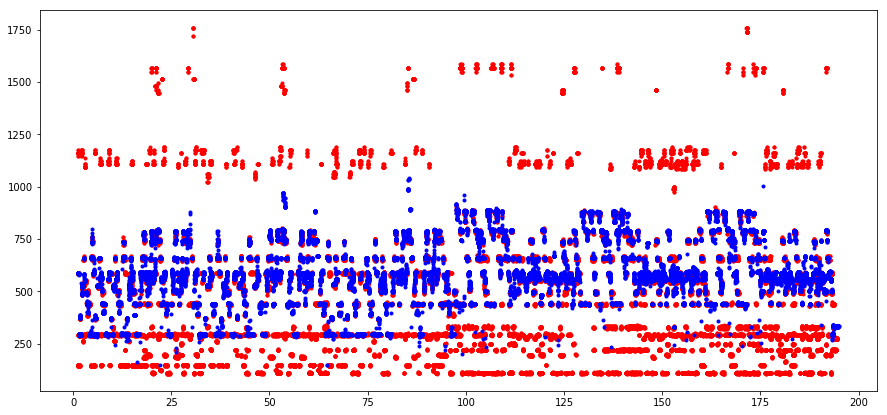

In [46]:
est_t, est_f = get_tf(est_times, est_freqs)
ref_t, ref_f = get_tf(ref_times, ref_freqs)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 7))
plt.plot(est_t, est_f, '.r')
plt.plot(ref_t, ref_f, '.b')
plt.show()

In [13]:
freqs

array([], dtype=float64)